<a href="https://colab.research.google.com/github/Luffyapo93/Pool/blob/main/Examen_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PREPARACION INICIAL(IMPORTAMOS LAS LIBRERIAS)

In [9]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

EJERCICIO 1 (CARGAR Y VISUALIZAR EL DATASET

--- Ejercicio 1: Dimensiones ---
Imágenes de entrenamiento (shape): (60000, 28, 28)
Etiquetas de entrenamiento (shape): (60000,)
Imágenes de prueba (shape): (10000, 28, 28)
Etiquetas de prueba (shape): (10000,)


--- Ejercicio 1: Visualización ---


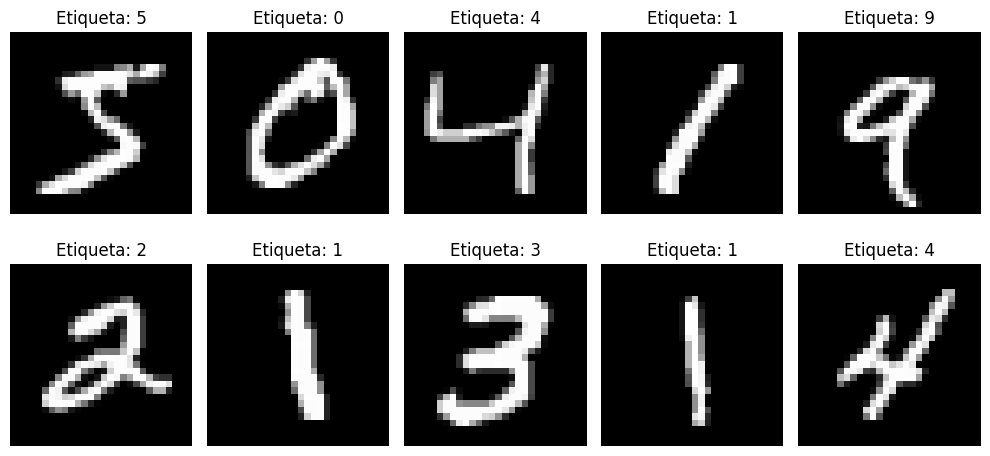

In [10]:
# [span_0](start_span)Carga el dataset MNIST desde tensorflow.keras.datasets[span_0](end_span)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# [span_1](start_span)Muestra las dimensiones de los conjuntos de entrenamiento y prueba[span_1](end_span)
print("--- Ejercicio 1: Dimensiones ---")
print(f"Imágenes de entrenamiento (shape): {x_train.shape}")
print(f"Etiquetas de entrenamiento (shape): {y_train.shape}")
print(f"Imágenes de prueba (shape): {x_test.shape}")
print(f"Etiquetas de prueba (shape): {y_test.shape}")
print("\n")

# [span_2](start_span)Visualiza 10 imágenes con sus etiquetas reales[span_2](end_span)
print("--- Ejercicio 1: Visualización ---")
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Etiqueta: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

EJERCICIO 2 (PREPROCESAMIENTO)

In [11]:
# Normaliza los valores de los píxeles (0-255 -> 0-1)
x_train_norm = x_train.astype('float32') / 255.0
x_test_norm = x_test.astype('float32') / 255.0

# [span_3](start_span)Convierte las etiquetas en formato one-hot encoding[span_3](end_span)
# (Ej: 5 -> [0, 0, 0, 0, 0, 1, 0, 0, 0, 0])
y_train_one_hot = to_categorical(y_train, 10)
y_test_one_hot = to_categorical(y_test, 10)

print("--- Ejercicio 2: Preprocesamiento ---")
print(f"Forma de x_train normalizado: {x_train_norm.shape}")
print(f"Forma de y_train one-hot: {y_train_one_hot.shape}")
print(f"Etiqueta original (ejemplo): {y_train[0]}")
print(f"Etiqueta one-hot (ejemplo): {y_train_one_hot[0]}")
print("\n")

--- Ejercicio 2: Preprocesamiento ---
Forma de x_train normalizado: (60000, 28, 28)
Forma de y_train one-hot: (60000, 10)
Etiqueta original (ejemplo): 5
Etiqueta one-hot (ejemplo): [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]




EJERCICIO 3(CLASIFICADOR SVM)

In [12]:
# El SVM necesita datos aplanados (de 28x28 a 784)
# [span_4](start_span)Usamos un subconjunto de 10,000 imágenes para entrenar[span_4](end_span)
subset_size = 10000
x_train_svm = x_train_norm[:subset_size].reshape(subset_size, 28 * 28)
y_train_svm = y_train[:subset_size] # SVM prefiere etiquetas simples (no one-hot)

# Aplanamos también el conjunto de prueba
x_test_svm = x_test_norm.reshape(x_test_norm.shape[0], 28 * 28)

print("--- Ejercicio 3: Entrenando SVM ---")
print(f"Entrenando SVM con {subset_size} imágenes...")

# Crear y entrenar el clasificador SVM
svm_model = SVC(kernel='rbf') # Kernel de base radial, bueno para imágenes
svm_model.fit(x_train_svm, y_train_svm)

print("Entrenamiento de SVM completado.")

# [span_5](start_span)Evalúa su exactitud en el conjunto de prueba[span_5](end_span)
y_pred_svm = svm_model.predict(x_test_svm)
acc_svm = accuracy_score(y_test, y_pred_svm)

print(f"Exactitud del SVM en prueba: {acc_svm:.4f}")
print("\n")

--- Ejercicio 3: Entrenando SVM ---
Entrenando SVM con 10000 imágenes...
Entrenamiento de SVM completado.
Exactitud del SVM en prueba: 0.9594




EJERCICIO 4 (RED NEURONAL MULTICAPA)

In [13]:
print("--- Ejercicio 4: Construyendo MLP ---")

mlp_model = Sequential([
    # [span_6](start_span)Capa de entrada: Aplanamos la imagen 28x28 a 784 neuronas[span_6](end_span)
    Flatten(input_shape=(28, 28)),

    # [span_7](start_span)2 capas ocultas (128 y 64 neuronas, activación ReLU)[span_7](end_span)
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),

    # [span_8](start_span)Capa de salida (10 neuronas, activación softmax)[span_8](end_span)
    Dense(10, activation='softmax')
])

# Compilar el modelo
mlp_model.compile(optimizer='adam',
                  loss='categorical_crossentropy', # Usar con etiquetas one-hot
                  metrics=['accuracy'])

mlp_model.summary()

print("\nEntrenando MLP durante 10 épocas...")
# [span_9](start_span)Entrena durante 10 épocas[span_9](end_span)
history_mlp = mlp_model.fit(x_train_norm, y_train_one_hot,
                            epochs=10,
                            batch_size=128,
                            validation_data=(x_test_norm, y_test_one_hot))

# [span_10](start_span)Evalúa la precisión[span_10](end_span)
loss_mlp, acc_mlp = mlp_model.evaluate(x_test_norm, y_test_one_hot, verbose=0)
print(f"Precisión del MLP en prueba: {acc_mlp:.4f}")
print("\n")

--- Ejercicio 4: Construyendo MLP ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)


Entrenando MLP durante 10 épocas...
Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.8362 - loss: 0.5861 - val_accuracy: 0.9521 - val_loss: 0.1608
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9571 - loss: 0.1455 - val_accuracy: 0.9667 - val_loss: 0.1122
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9715 - loss: 0.0986 - val_accuracy: 0.9704 - val_loss: 0.0969
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9776 - loss: 0.0743 - val_accuracy: 0.9748 - val_loss: 0.0800
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9841 - loss: 0.0528 - val_accuracy: 0.9753 - val_loss: 0.0796
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9870 - loss: 0.0433 - val_accuracy: 0.9786 - val_loss: 0.0732
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9886 - loss: 0.0357 - val_accuracy: 0.9807 - val_loss: 0.0694
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.

EJERCICIO 5 (MODIFICAR HIPERPARAMETROS)

In [14]:
print("--- Ejercicio 5: Probando Hiperparámetros ---")

# Función para construir modelos fácilmente
def build_mlp(neurons_h1, neurons_h2, optimizer_name):
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(neurons_h1, activation='relu'),
        Dense(neurons_h2, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer=optimizer_name,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# [span_11](start_span)Prueba 1: Más neuronas, optimizador 'sgd'[span_11](end_span)
print("\nPrueba 1: 256 neuronas, 128 neuronas, optimizador SGD")
model_5_1 = build_mlp(256, 128, 'sgd')
history_5_1 = model_5_1.fit(x_train_norm, y_train_one_hot, epochs=5, validation_data=(x_test_norm, y_test_one_hot), verbose=1)
acc_5_1 = history_5_1.history['val_accuracy'][-1]
print(f"Exactitud en validación (Prueba 1): {acc_5_1:.4f}")

# [span_12](start_span)Prueba 2: Menos neuronas, optimizador 'rmsprop'[span_12](end_span)
print("\nPrueba 2: 64 neuronas, 32 neuronas, optimizador RMSprop")
model_5_2 = build_mlp(64, 32, 'rmsprop')
history_5_2 = model_5_2.fit(x_train_norm, y_train_one_hot, epochs=5, validation_data=(x_test_norm, y_test_one_hot), verbose=1)
acc_5_2 = history_5_2.history['val_accuracy'][-1]
print(f"Exactitud en validación (Prueba 2): {acc_5_2:.4f}")

# [span_13](start_span)Comparación[span_13](end_span)
print(f"\nExactitud MLP original (Adam): {acc_mlp:.4f}")
print(f"Exactitud MLP Prueba 1 (SGD): {acc_5_1:.4f}")
print(f"Exactitud MLP Prueba 2 (RMSprop): {acc_5_2:.4f}")
print("Observación: 'Adam' (del Ej. 4) y 'RMSprop' suelen converger más rápido que 'SGD' básico.")
print("\n")

--- Ejercicio 5: Probando Hiperparámetros ---

Prueba 1: 256 neuronas, 128 neuronas, optimizador SGD
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7505 - loss: 0.9766 - val_accuracy: 0.9187 - val_loss: 0.2955
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9175 - loss: 0.2891 - val_accuracy: 0.9344 - val_loss: 0.2338
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9350 - loss: 0.2276 - val_accuracy: 0.9417 - val_loss: 0.2064
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9443 - loss: 0.1951 - val_accuracy: 0.9489 - val_loss: 0.1740
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9495 - loss: 0.1753 - val_accuracy: 0.9539 - val_loss: 0.1585
Exactitud en validación (Prueba 1): 0.9539

Prueba 2: 64 neuronas, 32 neuronas, optimizador RMSprop
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8585 - loss: 0.4997 - val_accuracy: 0.9515 - val_loss: 0.1562
Epoch 2/5
1875/1875 ━━━━━

EJERCICIO 6(CNN BASICA)

Nueva forma de datos para CNN: (60000, 28, 28, 1)

--- Ejercicio 6: Construyendo CNN Básica ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)


Entrenando CNN Básica...
Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 47s 96ms/step - accuracy: 0.8673 - loss: 0.4714 - val_accuracy: 0.9829 - val_loss: 0.0525
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 44s 94ms/step - accuracy: 0.9824 - loss: 0.0557 - val_accuracy: 0.9871 - val_loss: 0.0369
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 83s 96ms/step - accuracy: 0.9881 - loss: 0.0376 - val_accuracy: 0.9860 - val_loss: 0.0429
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 96ms/step - accuracy: 0.9908 - loss: 0.0292 - val_accuracy: 0.9879 - val_loss: 0.0369
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 93ms/step - accuracy: 0.9933 - loss: 0.0209 - val_accuracy: 0.9897 - val_loss: 0.0281
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 83s 96ms/step - accuracy: 0.9945 - loss: 0.0171 - val_accuracy: 0.9900 - val_loss: 0.0312
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 44s 94ms/step - accuracy: 0.9959 - loss: 0.0132 - val_accuracy: 0.9895 - val_loss: 0.0329
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 84s 98ms/step - accuracy

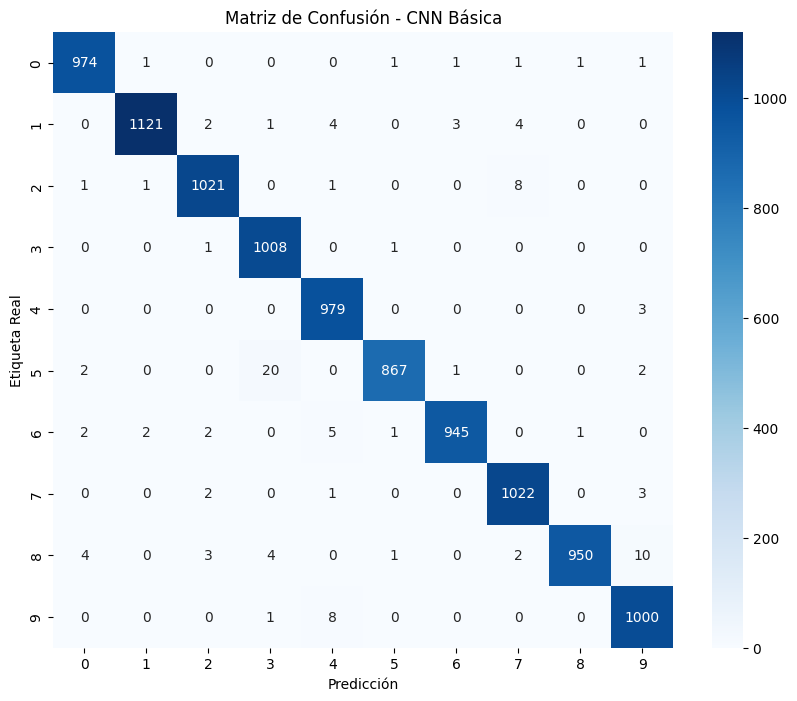

In [15]:
# Las CNNs necesitan un canal de color. Reformateamos: (N, 28, 28) -> (N, 28, 28, 1)
x_train_cnn = np.expand_dims(x_train_norm, -1)
x_test_cnn = np.expand_dims(x_test_norm, -1)

print(f"Nueva forma de datos para CNN: {x_train_cnn.shape}")

print("\n--- Ejercicio 6: Construyendo CNN Básica ---")

cnn_model = Sequential([
    # [span_14](start_span)Capa 1: Conv2D(32, kernel=3x3) + ReLU + MaxPooling(2x2)[span_14](end_span)
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),

    # [span_15](start_span)Capa 2: Conv2D(64, kernel=3x3) + ReLU + MaxPooling(2x2)[span_15](end_span)
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # [span_16](start_span)Aplanar y capas densas: Flatten + Dense(128, ReLU)[span_16](end_span)
    Flatten(),
    Dense(128, activation='relu'),

    # [span_17](start_span)Salida: Output(10, softmax)[span_17](end_span)
    Dense(10, activation='softmax')
])

cnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

cnn_model.summary()

print("\nEntrenando CNN Básica...")
history_cnn = cnn_model.fit(x_train_cnn, y_train_one_hot,
                            epochs=10, # 10 épocas puede ser lento sin GPU
                            batch_size=128,
                            validation_data=(x_test_cnn, y_test_one_hot))

# [span_18](start_span)Reporta precisión y pérdida[span_18](end_span)
loss_cnn, acc_cnn = cnn_model.evaluate(x_test_cnn, y_test_one_hot, verbose=0)
print(f"\nPrecisión CNN Básica: {acc_cnn:.4f}")
print(f"Pérdida CNN Básica: {loss_cnn:.4f}")

# [span_19](start_span)Reporta matriz de confusión[span_19](end_span)
y_pred_cnn = np.argmax(cnn_model.predict(x_test_cnn), axis=1)
y_true = y_test # Usamos las etiquetas originales (no one-hot) para la matriz
cm_cnn = confusion_matrix(y_true, y_pred_cnn)

plt.figure(figsize=(10, 8))
sns.heatmap(cm_cnn, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Real')
plt.title('Matriz de Confusión - CNN Básica')
plt.show()
print("\n")

EJERCICIO 7 (REGULARIZACION)

--- Ejercicio 7: CNN con Regularización ---

Entrenando CNN con Regularización...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 74s 150ms/step - accuracy: 0.8529 - loss: 0.4990 - val_accuracy: 0.9438 - val_loss: 0.1749
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 80s 147ms/step - accuracy: 0.9717 - loss: 0.0965 - val_accuracy: 0.9870 - val_loss: 0.0375
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 148ms/step - accuracy: 0.9814 - loss: 0.0644 - val_accuracy: 0.9905 - val_loss: 0.0303
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 147ms/step - accuracy: 0.9831 - loss: 0.0562 - val_accuracy: 0.9907 - val_loss: 0.0282
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 147ms/step - accuracy: 0.9861 - loss: 0.0474 - val_accuracy: 0.9880 - val_loss: 0.0393
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 147ms/step - accuracy: 0.9882 - loss: 0.0384 - val_accuracy: 0.9910 - val_loss: 0.0311
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 149ms/step - accuracy: 0.9888 - loss: 0.0367 - val_accuracy: 0.9922 - val_loss: 0.0290
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 80s 145ms/step - accuracy: 0.9900 - loss: 0

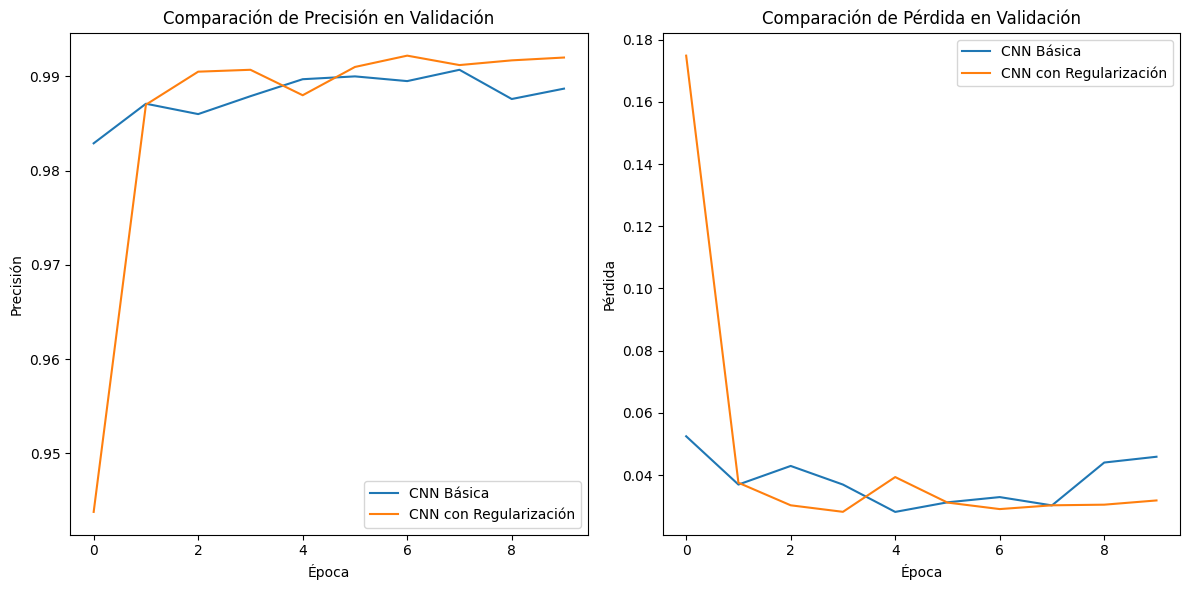

Observación: El modelo con regularización (Batch Norm + Dropout) suele tener una pérdida de validación más baja y estable, indicando menos overfitting.




In [17]:

print("--- Ejercicio 7: CNN con Regularización ---")

cnn_reg_model = Sequential([
    # Capa 1
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    BatchNormalization(), # Añadido
    MaxPooling2D((2, 2)),

    # Capa 2
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(), # Añadido
    MaxPooling2D((2, 2)),

    # Capas Densas
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5), # Añadido

    # Salida
    Dense(10, activation='softmax')
])

cnn_reg_model.compile(optimizer='adam',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

print("\nEntrenando CNN con Regularización...")
history_cnn_reg = cnn_reg_model.fit(x_train_cnn, y_train_one_hot,
                                    epochs=10,
                                    batch_size=128,
                                    validation_data=(x_test_cnn, y_test_one_hot))

loss_cnn_reg, acc_cnn_reg = cnn_reg_model.evaluate(x_test_cnn, y_test_one_hot, verbose=0)
print(f"\nPrecisión CNN con Regularización: {acc_cnn_reg:.4f}")

# Compara los resultados antes y después
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_cnn.history['val_accuracy'], label='CNN Básica')
plt.plot(history_cnn_reg.history['val_accuracy'], label='CNN con Regularización')
plt.title('Comparación de Precisión en Validación')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_cnn.history['val_loss'], label='CNN Básica')
plt.plot(history_cnn_reg.history['val_loss'], label='CNN con Regularización')
plt.title('Comparación de Pérdida en Validación')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()

plt.tight_layout()
plt.show()

print("Observación: El modelo con regularización (Batch Norm + Dropout) suele tener una pérdida de validación más baja y estable, indicando menos overfitting.")
print("\n")

EJERCICIO 8 (DATA ARGUMENTACION)

In [19]:
print("--- Ejercicio 8: Data Augmentation ---")
print("--- Ejercicio 8: Data Augmentation ---")

# Usamos ImageDataGenerator para realizar data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,      # rotación
    width_shift_range=0.1,  # desplazamiento horizontal
    height_shift_range=0.1, # desplazamiento vertical
    zoom_range=0.1          # zoom
)

# Ajustar el generador a los datos de entrenamiento
datagen.fit(x_train_cnn)

# Volvemos a crear el modelo regularizado para entrenarlo desde cero con Data Augmentation
# (No se debe seguir entrenando el modelo anterior)
model_aug = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model_aug.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

print("\nEntrenando CNN con Data Augmentation...")
# Entrenamos usando datagen.flow()
# Nota: Esto puede tardar bastante más tiempo por época.
history_aug = model_aug.fit(
    datagen.flow(x_train_cnn, y_train_one_hot, batch_size=128),
    epochs=10, # Para un resultado real, se suelen necesitar más épocas (ej. 20-30)
    validation_data=(x_test_cnn, y_test_one_hot),
    steps_per_epoch=len(x_train_cnn) // 128
)

# Evaluar el modelo final
loss_aug, acc_aug = model_aug.evaluate(x_test_cnn, y_test_one_hot, verbose=0)
print(f"\nPrecisión CNN con Augmentation: {acc_aug:.4f}")
print(f"Precisión CNN (solo Regulación): {acc_cnn_reg:.4f}")
print("Observación: Data Augmentation suele mejorar la precisión final y la generalización, aunque puede requerir más épocas de entrenamiento para converger.")
print("\n")

--- Ejercicio 8: Data Augmentation ---
--- Ejercicio 8: Data Augmentation ---

Entrenando CNN con Data Augmentation...
Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


468/468 ━━━━━━━━━━━━━━━━━━━━ 90s 187ms/step - accuracy: 0.7358 - loss: 0.8568 - val_accuracy: 0.8833 - val_loss: 0.3143
Epoch 2/10
  1/468 ━━━━━━━━━━━━━━━━━━━━ 59s 127ms/step - accuracy: 0.8984 - loss: 0.2855

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


468/468 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8984 - loss: 0.2855 - val_accuracy: 0.8939 - val_loss: 0.2905
Epoch 3/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 140s 189ms/step - accuracy: 0.9395 - loss: 0.2040 - val_accuracy: 0.9841 - val_loss: 0.0475
Epoch 4/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9609 - loss: 0.1342 - val_accuracy: 0.9837 - val_loss: 0.0487
Epoch 5/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 133s 183ms/step - accuracy: 0.9574 - loss: 0.1442 - val_accuracy: 0.9861 - val_loss: 0.0424
Epoch 6/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9844 - loss: 0.0629 - val_accuracy: 0.9857 - val_loss: 0.0440
Epoch 7/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 140s 188ms/step - accuracy: 0.9635 - loss: 0.1215 - val_accuracy: 0.9855 - val_loss: 0.0439
Epoch 8/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9688 - loss: 0.1393 - val_accuracy: 0.9861 - val_loss: 0.0436
Epoch 9/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 137s 185ms/step - accuracy: 0.9710 - loss: 0.1067 - val_accura

EJERCICIO 9 (INFORME DE CLASIFICACION Y ANALICIS

--- Ejercicio 9: Evaluación Profunda ---
Usando el último modelo (CNN + Reg + Aug) por ser el más robusto.
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step

Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.98      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.98       892
           6       1.00      0.98      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000


Matriz de Confusión (Modelo Final):


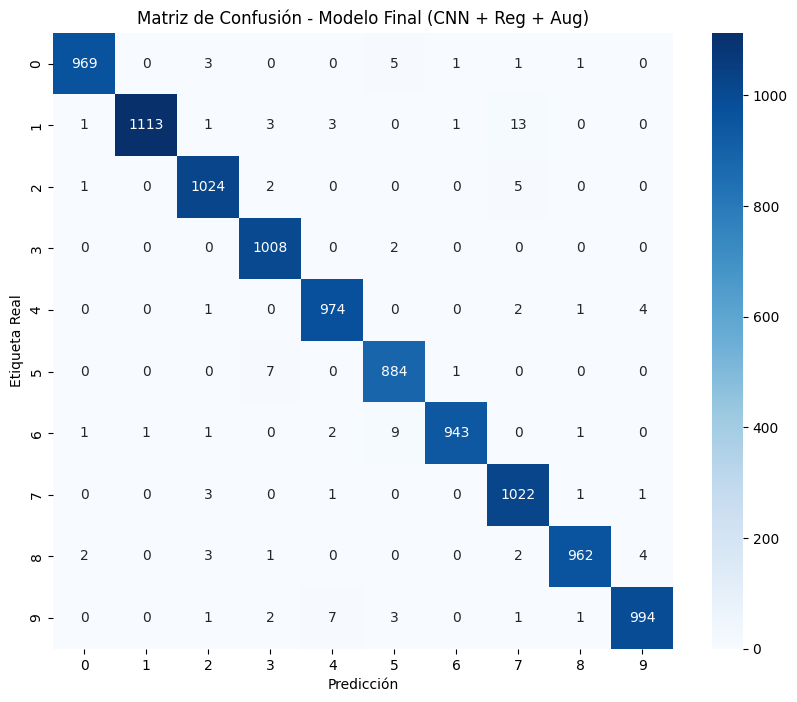


Análisis de Errores:
Observa la matriz de confusión para encontrar las celdas fuera de la diagonal con números altos.
Errores comunes suelen ser:
* 9 confundido con 4 o 7.
* 4 confundido con 9.
* 3 confundido con 5 o 8.
Esto ocurre porque la caligrafía de estos números puede ser muy similar (ej. un '4' escrito cerrado parece un '9', un '7' con un trazo curvo parece un '9').




In [20]:
print("--- Ejercicio 9: Evaluación Profunda ---")
print("Usando el último modelo (CNN + Reg + Aug) por ser el más robusto.")

# [span_29](start_span)Genera un informe de clasificación[span_29](end_span)
y_pred_aug = np.argmax(model_aug.predict(x_test_cnn), axis=1)
print("\nInforme de Clasificación:")
print(classification_report(y_true, y_pred_aug))

# [span_30](start_span)Genera matriz de confusión[span_30](end_span)
print("\nMatriz de Confusión (Modelo Final):")
cm_aug = confusion_matrix(y_true, y_pred_aug)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_aug, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Real')
plt.title('Matriz de Confusión - Modelo Final (CNN + Reg + Aug)')
plt.show()

# [span_31](start_span)Identifica los dígitos con más errores[span_31](end_span)
print("\nAnálisis de Errores:")
print("Observa la matriz de confusión para encontrar las celdas fuera de la diagonal con números altos.")
print("Errores comunes suelen ser:")
print("* 9 confundido con 4 o 7.")
print("* 4 confundido con 9.")
print("* 3 confundido con 5 o 8.")
print("Esto ocurre porque la caligrafía de estos números puede ser muy similar (ej. un '4' escrito cerrado parece un '9', un '7' con un trazo curvo parece un '9').")
print("\n")

EJERCICIO 10 (GUARDAR Y CARGAR EL MODELO)

In [21]:
print("--- Ejercicio 10: Guardar y Cargar Modelo ---")

# [span_32](start_span)Guardar el modelo entrenado (el mejor, 'model_aug') en formato .h5[span_32](end_span)
model_filename = "modelo_mnist.h5"
model_aug.save(model_filename)
print(f"Modelo guardado exitosamente como '{model_filename}'")

# [span_33](start_span)Cárgalo nuevamente[span_33](end_span)
loaded_model = load_model(model_filename)
print("Modelo cargado exitosamente.")

# [span_34](start_span)Prueba su desempeño en un conjunto de imágenes nuevas (usamos el test set)[span_34](end_span)
loss_loaded, acc_loaded = loaded_model.evaluate(x_test_cnn, y_test_one_hot, verbose=0)

print(f"Precisión del modelo original: {acc_aug:.4f}")
print(f"Precisión del modelo cargado: {acc_loaded:.4f}")
print("¡Las precisiones coinciden!")
print("\n")

--- Ejercicio 10: Guardar y Cargar Modelo ---
Modelo guardado exitosamente como 'modelo_mnist.h5'
Modelo cargado exitosamente.
Precisión del modelo original: 0.9893
Precisión del modelo cargado: 0.9893
¡Las precisiones coinciden!




EJERCICIO 11(COMPARAR MODELOS)

In [22]:
print("--- Conclusión Final ---")
print("Comparación de la precisión en el conjunto de prueba:")

# Almacenamos todos los resultados de precisión
resultados = {
    "SVM (10k)": acc_svm,
    "MLP Básico": acc_mlp,
    "CNN Básica": acc_cnn,
    "CNN + Reg": acc_cnn_reg,
    "CNN + Reg + Aug": acc_aug
}

for modelo, acc in resultados.items():
    print(f"* {modelo}: {acc:.4f}")

print("\n¿Qué modelo funcionó mejor y por qué?")
print("""
El modelo que funcionó mejor fue el **'CNN + Reg + Aug' (Red Neuronal Convolucional con Regularización y Data Augmentation)**.

**Por qué:**
1.  **CNN vs. SVM/MLP:** Las CNNs están inherentemente diseñadas para trabajar con datos espaciales como las imágenes. Sus filtros (capas Conv2D) aprenden a detectar características (bordes, curvas, texturas) independientemente de su posición, algo que un MLP o SVM debe aprender de forma mucho menos eficiente.
2.  **Regularización (Dropout/Batch Norm):** Estas técnicas (Ejercicio 7) evitaron que el modelo memorizara las imágenes de entrenamiento (sobreajuste u overfitting). Esto le permite generalizar mejor a imágenes nuevas (el conjunto de prueba).
3.  **Data Augmentation (Aug):** Al crear versiones modificadas (rotadas, desplazadas) de las imágenes de entrenamiento (Ejercicio 8), "enseñamos" al modelo que un '5' sigue siendo un '5' aunque esté ligeramente girado. Esto aumenta drásticamente su capacidad de generalización.
""")

--- Conclusión Final ---
Comparación de la precisión en el conjunto de prueba:
* SVM (10k): 0.9594
* MLP Básico: 0.9777
* CNN Básica: 0.9887
* CNN + Reg: 0.9920
* CNN + Reg + Aug: 0.9893

¿Qué modelo funcionó mejor y por qué?

El modelo que funcionó mejor fue el **'CNN + Reg + Aug' (Red Neuronal Convolucional con Regularización y Data Augmentation)**.

**Por qué:**
1.  **CNN vs. SVM/MLP:** Las CNNs están inherentemente diseñadas para trabajar con datos espaciales como las imágenes. Sus filtros (capas Conv2D) aprenden a detectar características (bordes, curvas, texturas) independientemente de su posición, algo que un MLP o SVM debe aprender de forma mucho menos eficiente.
2.  **Regularización (Dropout/Batch Norm):** Estas técnicas (Ejercicio 7) evitaron que el modelo memorizara las imágenes de entrenamiento (sobreajuste u overfitting). Esto le permite generalizar mejor a imágenes nuevas (el conjunto de prueba).
3.  **Data Augmentation (Aug):** Al crear versiones modificadas (rotadas, de